<a href="https://colab.research.google.com/github/Mi1kDev/CST3133_CW/blob/main/CST3133_CourseWork_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CST3133 - Applied Data Science and AI Workflow - Final Coursework Submission**

---

**Students:**

RINCON RODRIGUES, Alam - M00774667

MORGAN, Teon - M00829986

ATANASOV, Petar - M00916537

---

**Machine Learning Workflow and Ethics - Coursework A**

---

**Munis, M. (2025) 'Bank Transaction for Fraud Detection EDA & ML'. Available at: https://www.kaggle.com/code/mervanmunis/bank-transaction-for-fraud-detection-eda-ml (Accessed: 14 April 2025).**

# Machine Learning Workflow and Ethics - Coursework A


Connecting the project to google drive for easy members access.

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.1 Dataset Selection and Problem Definition

-- clustering problem

-- database from kaggle link bellow

https://www.kaggle.com/code/mervanmunis/bank-transaction-for-fraud-detection-eda-ml



Importing core python libraries


*   pandas for dataset manipulation
*   numpy for mathematical processes
*   pyplot and seaborn for data visualization



In [8]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read in dataset file and view the first few rows
dataset = pd.read_csv("/content/drive/MyDrive/CST3133_CW/datasets/Coursework A - Noise Included.csv")
dataset.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56.0,1.0,1122.35,2024-11-04 8:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25.0,1.0,8569.06,2024-11-04 8:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198.0,1.0,7429.40,2024-11-04 8:06:39


Display general information breakdown of the dataset.

In [9]:
# provides statistical information for the numerical columns of the dataset
dataset.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2519.000000,2521.000000,2520.000000,2520.000000,2520.000000
mean,297.198706,44.669179,119.522222,1.125397,5098.790758
std,291.781862,17.788886,69.896074,0.602487,3904.441591
min,0.260000,18.000000,10.000000,1.000000,97.060000
25%,81.430000,27.000000,63.000000,1.000000,1490.415000
50%,210.450000,45.000000,112.000000,1.000000,4717.175000
75%,413.105000,59.000000,161.000000,1.000000,7664.222500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [10]:
# provides information regarding the various features of the dataset, most notably the datatype and object count of each feature
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2521 entries, 0 to 2520
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2521 non-null   object 
 1   AccountID                2521 non-null   object 
 2   TransactionAmount        2519 non-null   float64
 3   TransactionDate          2519 non-null   object 
 4   TransactionType          2521 non-null   object 
 5   Location                 2519 non-null   object 
 6   DeviceID                 2521 non-null   object 
 7   IP Address               2521 non-null   object 
 8   MerchantID               2521 non-null   object 
 9   Channel                  2519 non-null   object 
 10  CustomerAge              2521 non-null   int64  
 11  CustomerOccupation       2520 non-null   object 
 12  TransactionDuration      2520 non-null   float64
 13  LoginAttempts            2520 non-null   float64
 14  AccountBalance          

## 1.2 Data Preprocessing

Handle missing values appropriately, as required.

Scale/normalize numerical features and encode categorical variable, as required.

Conduct logical feature selection or engineering, as required.

Checks for any missing values in the dataset.

In [11]:
# Checking for missing values
missing_values = ["n/a", "na", "--"]
display(dataset.isnull().sum())
print(dataset.isnull().sum().sum())

,0
TransactionID,0
AccountID,0
TransactionAmount,2
TransactionDate,2
TransactionType,0
Location,2
DeviceID,0
IP Address,0
MerchantID,0
Channel,2


14


Remove data entries with missing values as the count of missing values was determined to be inconsequential.

In [13]:
# removes any null or NaN values from the dataset
dataset.dropna(axis=0, how='any', inplace=True)
display(dataset.isnull().sum())

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


Converts the datatype of the date object fields to actual datetype fields.

In [14]:
#Converting dates to  datetime objects
dataset['TransactionDate'] = pd.to_datetime(dataset['TransactionDate'])
dataset['PreviousTransactionDate'] = pd.to_datetime(dataset['PreviousTransactionDate'])
# Time Gap analysis for anonaly detection
dataset['TimeGap'] = -1 * (dataset['TransactionDate'] - dataset['PreviousTransactionDate']).dt.total_seconds() / 60

Encode categorical data values for use.

In [15]:
from sklearn.preprocessing import OneHotEncoder

#Encoding categorical data

#Maps an hour as an integer to a time of day
def mapHour(h):
  if h >= 5 and h < 12:
    return "Morning"
  elif h >= 12 and h < 17:
    return "Afternoon"
  elif h >= 17 and h < 20:
    return "Evening"
  elif h >= 20 or h < 5:
    return "Night"
  else:
    return "NaN"

#encodes dates into two columns the day and the period of the day
def convertDate(ds, dateColumn, dayColumn, timeColumn):
  day = ds[dateColumn].dt.day_name()
  hour = ds[dateColumn].dt.hour
  hour = hour.map(mapHour)

  ds[dayColumn] = day
  ds[timeColumn] = hour

convertDate(dataset, 'TransactionDate', 'TransactionDateWeek', 'TransactionDateTimeOfDay')
convertDate(dataset, 'PreviousTransactionDate', 'PreviousTransactionDateWeek', 'PreviousTransactionDateTimeOfDay')

#Hot Encode the categorical data
categoricalData = dataset[['Location', 'Channel', 'CustomerOccupation', 'TransactionType', 'TransactionDateWeek', 'TransactionDateTimeOfDay', 'PreviousTransactionDateWeek', 'PreviousTransactionDateTimeOfDay']].columns.tolist()
encoder = OneHotEncoder(sparse_output=False)
oneHotEncoded = encoder.fit_transform(dataset[categoricalData])
dataset['Hour'] = dataset['TransactionDate'].dt.hour
oneHotCategoricalData = pd.DataFrame(oneHotEncoded, columns=encoder.get_feature_names_out(categoricalData))


Identify which Scaler to utilize.

Identify outliers in the dataset using Interquartile Range.


In [16]:
numericalColumns = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
threshold = 1.5

columnOutliers = {}
columnOutlierCount = {}
# identify outliers using interquartile range method
for column in numericalColumns:
  Q1 = dataset[column].quantile(0.25)
  Q3 = dataset[column].quantile(0.75)
  # calculate interquartile range of each numerical column
  IQR = Q3 - Q1
  # data points falling outside of the established range are considered outliers
  outliers = dataset[(dataset[column] < Q1 - threshold * IQR) | (dataset[column] > Q3 + threshold * IQR)]
  columnOutliers[column] = outliers
  columnOutlierCount[column] = len(outliers)

#depict the calculated outlier count for the numerical columns
print(columnOutlierCount)


{'TransactionAmount': 113, 'CustomerAge': 0, 'TransactionDuration': 0, 'LoginAttempts': 122, 'AccountBalance': 0}


Outliers Identified in the dataset, meaning MinMax and StandardScalers would not be ideal selections but RobustScaler could be applied.

In [17]:
from sklearn.preprocessing import RobustScaler

### 1.2.1 Feature Selection and Augmentation

Features determined to have the most relevance in identifying fraudulent transactions via both domain knowledge and exploratory data analysis.

In [18]:
# creating a new data feature by augmenting existing features
dataset['TA:AB Ratio'] = dataset['TransactionAmount'] / dataset['AccountBalance']

scaler = RobustScaler()
# feature selection for features to be analysed regarding fraud detection
strippedDataset = pd.concat([dataset[['AccountBalance', 'TransactionAmount', 'TimeGap', 'TA:AB Ratio']], oneHotCategoricalData[['Channel_ATM', 'Channel_Online', 'Channel_Branch', 'TransactionDateTimeOfDay_Afternoon', 'TransactionDateTimeOfDay_Evening', 'TransactionDateWeek_Monday', 'TransactionDateWeek_Thursday', 'TransactionDateWeek_Tuesday','TransactionDateWeek_Wednesday','TransactionDateWeek_Friday']]], axis=1)

scaledData = scaler.fit_transform(strippedDataset)

## 1.3 Exploratory Data Analysis

Create insightful visualizations, e.g., histograms and correlation heatmaps.

Identify and comment on trends, patterns, and potential biases in the data.

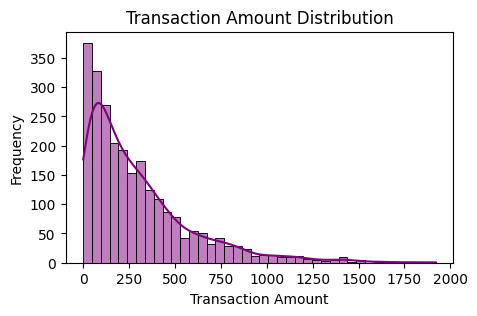

In [19]:
#Transaction Amount Diistribution

plt.figure(figsize = (5,3))
sns.histplot(dataset['TransactionAmount'], kde=True, color='purple')
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

From the transaction distribution graph we could observe we have low to high volume transatcions.

In our case the high volume transactions are rare, from this point we can analyse for potential fraudulent transaction.

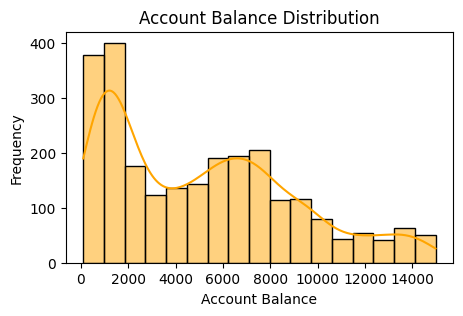

In [20]:
#Account Balance Distribution
plt.figure(figsize = (5,3))
sns.histplot(dataset['AccountBalance'], kde=True, color='orange')
plt.title('Account Balance Distribution')
plt.xlabel('Account Balance')
plt.ylabel('Frequency')
plt.show()

The high amount of transaction as shown on the plot could carry risk in terms of low balances.

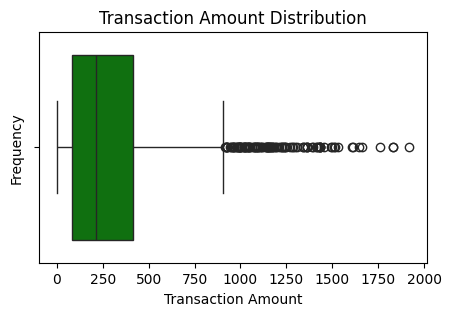

In [21]:
# Detecting outliers in Transaction Amount Distribution
plt.figure(figsize=(5,3))
sns.boxplot(x='TransactionAmount', data=dataset, color='green')
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

Outliers overview brought us the observation of abnormally high transactions, which couldbe suspicious.

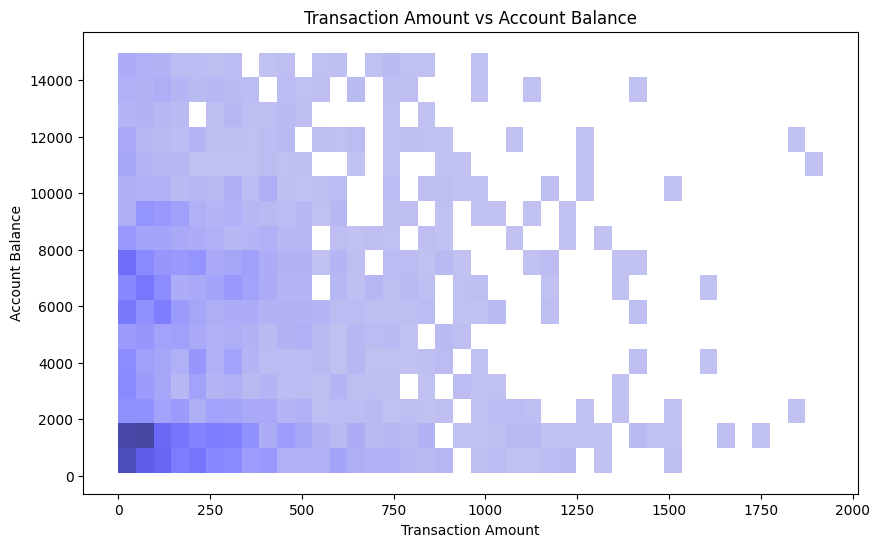

In [22]:
# Transaction Amount vs Account Balance
plt.figure(figsize=(10,6))
sns.histplot(x=dataset['TransactionAmount'], y=dataset['AccountBalance'], kde=True, color = 'blue')
plt.title('Transaction Amount vs Account Balance')
plt.xlabel('Transaction Amount')
plt.ylabel('Account Balance')
plt.show()

As presented the account balance is low and high amount transactions could vary of a potential risk, therefore we need to consider this and be extra carefull in terms of handling those transcations.

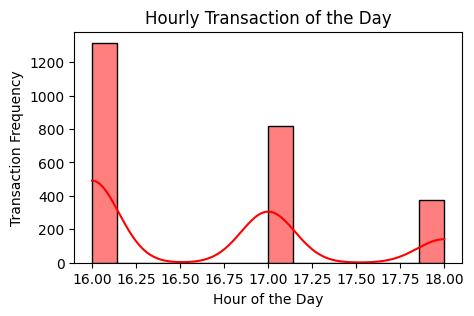

In [23]:
# Hourly Transaction of the Day
plt.figure(figsize=(5,3))
sns.histplot(dataset['Hour'], kde=True,color='red')
plt.title('Hourly Transaction of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Transaction Frequency')
plt.show()

The main transactions throughout the day are between 16:00-18:00, the high transactions are from 16:00 and slowing down between 17:00 and 18:00.

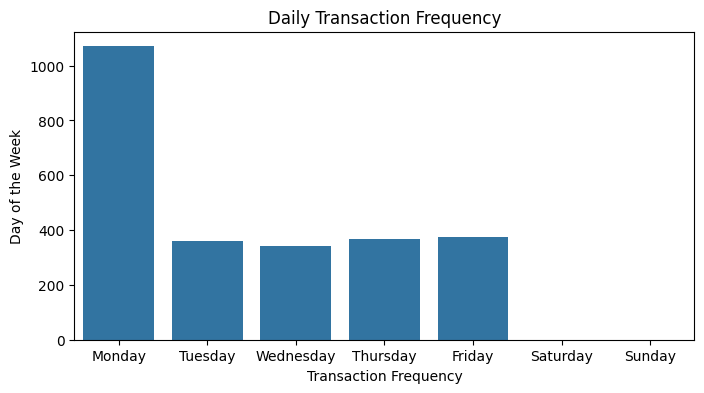

In [24]:
# Frequency of transactions per day
plt.figure(figsize=(8,4))
sns.countplot(data = dataset, x='TransactionDateWeek', order=['Monday','Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Daily Transaction Frequency')
plt.xlabel('Transaction Frequency')
plt.ylabel('Day of the Week')
plt.show()

Transactions are shown the most during the week days, with Monday being by far the most frequent transaction day.

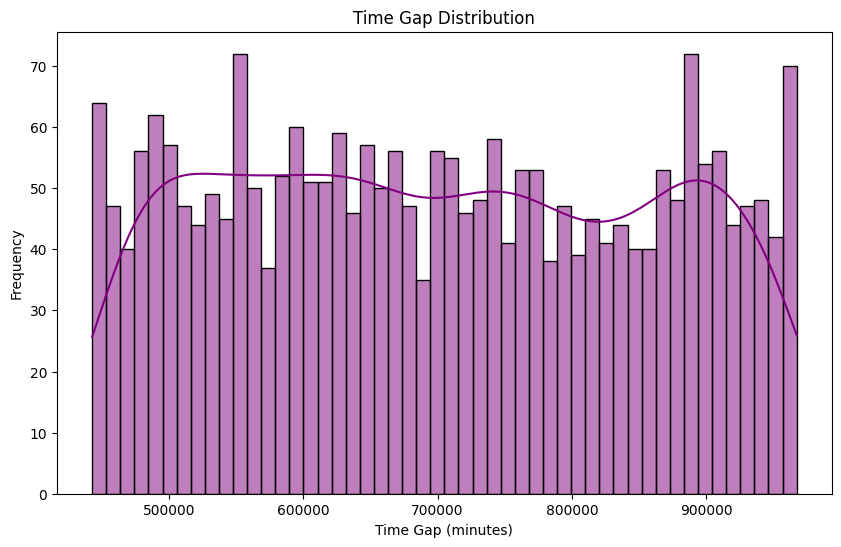

In [25]:
# plot the TimeGap
plt.figure(figsize=(10,6))
sns.histplot(dataset['TimeGap'], kde=True, bins=50, color='purple')
plt.title('Time Gap Distribution')
plt.xlabel('Time Gap (minutes)')
plt.ylabel('Frequency')
plt.show()

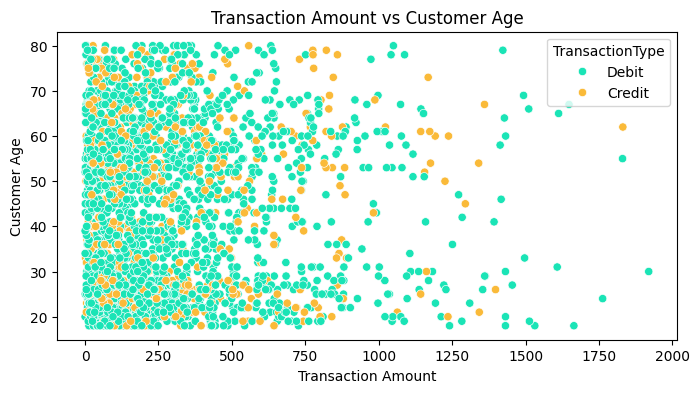

In [26]:
# Tranasaction Amount vs Customer Age Analysis
plt.figure(figsize=(8,4))
sns.scatterplot(x='TransactionAmount', y='CustomerAge', data=dataset, hue='TransactionType', palette='turbo')
plt.title('Transaction Amount vs Customer Age')
plt.xlabel('Transaction Amount')
plt.ylabel('Customer Age')
plt.show()

The plot above shows how the transaction amount varies based on the customer age.

We may determine if there are any patterns or unusual behaviors in how people of different ages spend money by examining the plot.

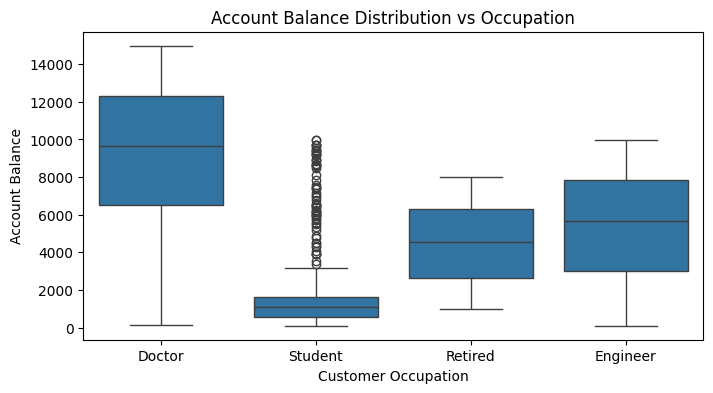

In [27]:
# Account Balance vs Occupation Analysis
plt.figure(figsize=(8,4))
sns.boxplot(x='CustomerOccupation', y='AccountBalance', data=dataset)
plt.title('Account Balance Distribution vs Occupation')
plt.xlabel('Customer Occupation')
plt.ylabel('Account Balance')
plt.show()

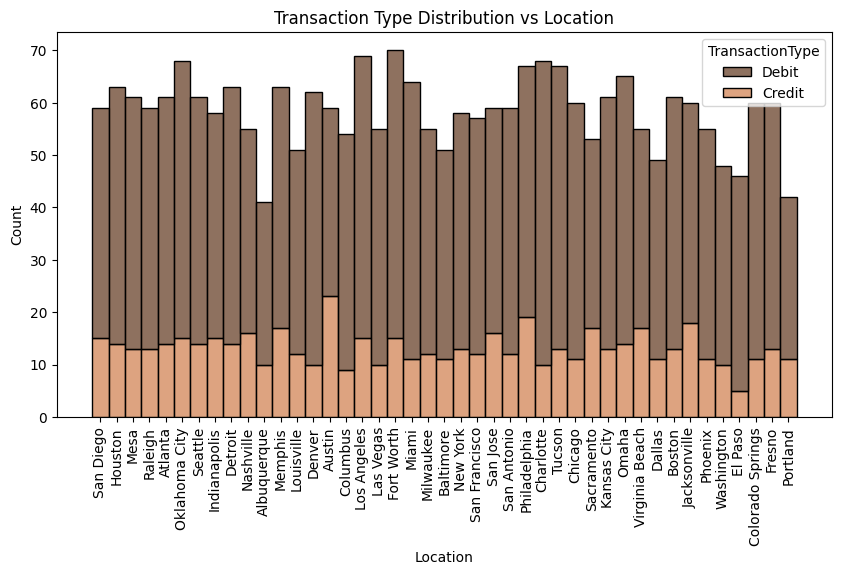

In [28]:
# Analysing Transaction Type Distribution vs Location
plt.figure(figsize=(10,5))
sns.histplot(x='Location', data=dataset, hue='TransactionType', multiple='stack', palette='copper')
plt.title('Transaction Type Distribution vs Location')
plt.xticks(rotation=90)
plt.xlabel('Location', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

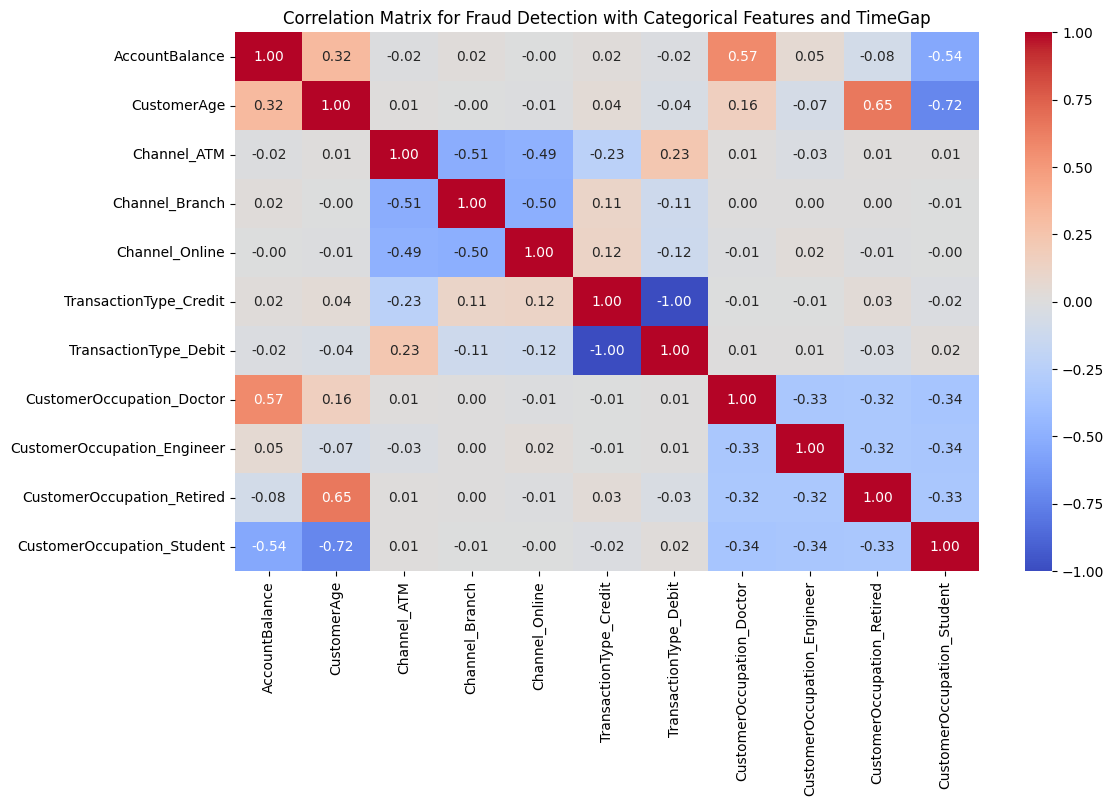

In [29]:
# Correlation Heatmaps implementation
# Selecting features for correlation analysis
features_for_correlation = ['AccountBalance', 'CustomerAge', 'Channel', 'TransactionType', 'CustomerOccupation']
data_for_correlation = dataset[features_for_correlation]

#One hot encoding for categorical data
categorical_features = ['Channel', 'TransactionType', 'CustomerOccupation']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(data_for_correlation[categorical_features])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))

#combine the encoded features with numerical
numerical_features = ['AccountBalance', 'CustomerAge']
data_for_correlation = pd.concat([data_for_correlation[numerical_features], encoded_df], axis=1)

# Calculating the correlation matrix
corr_matrix = data_for_correlation.corr()

# Plotting the heatmap
plt.figure(figsize=(12,7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Fraud Detection with Categorical Features and TimeGap')
plt.yticks(rotation=0)
plt.show()

The correlation heatmap illustrates the interrelationships among features in a dataset, employing a color gradient to indicate the strength and nature of these correlations.

Warm colors signify positive correlations, while cool colors denote negative correlations, and neutral colors indicate weak or absent relationships.

This visualization serves as a valuable tool for data analysts to detect trends, enhance feature selection, comprehend model interactions, and ultimately extract actionable insights from the data.

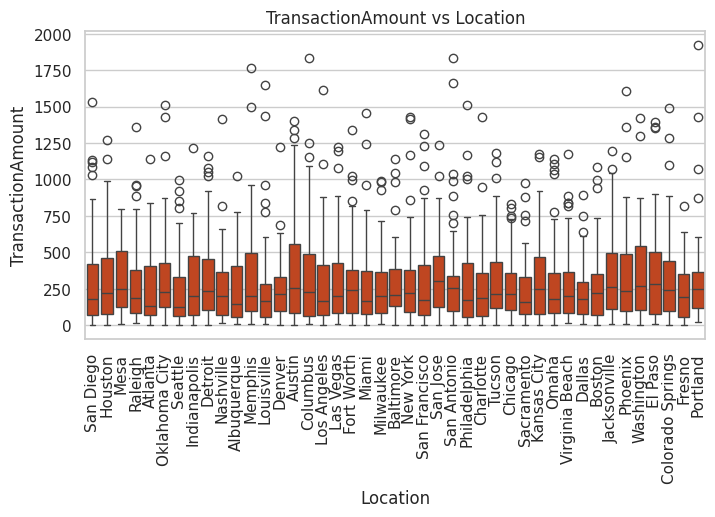

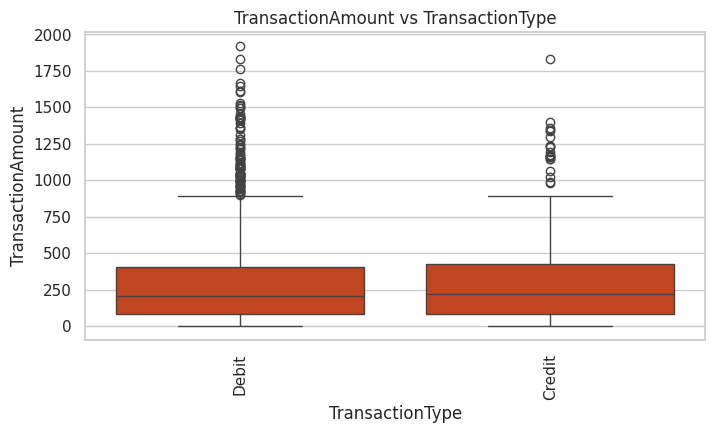

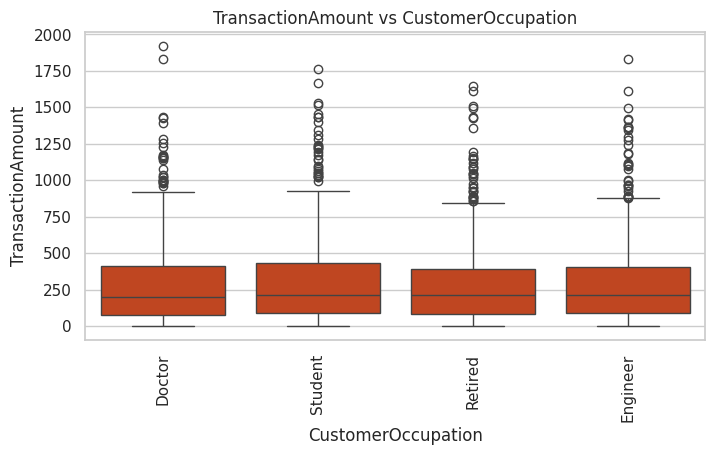

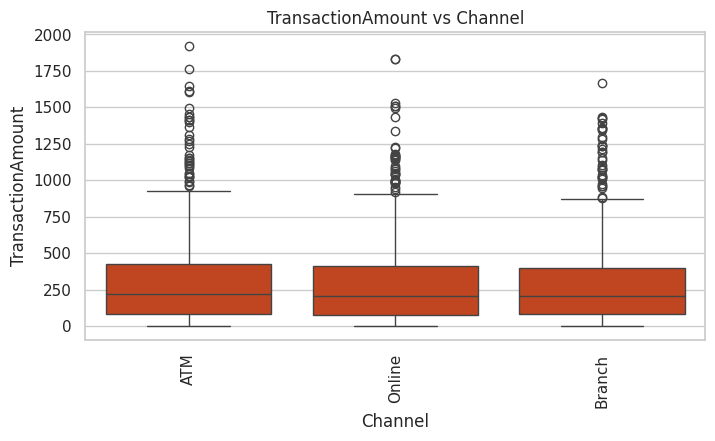

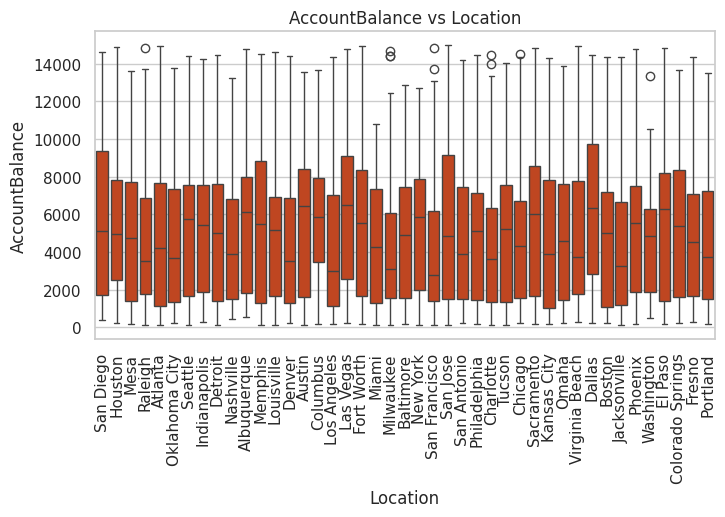

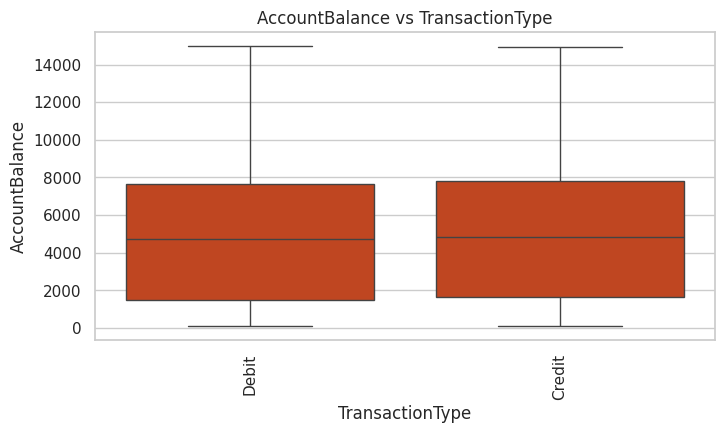

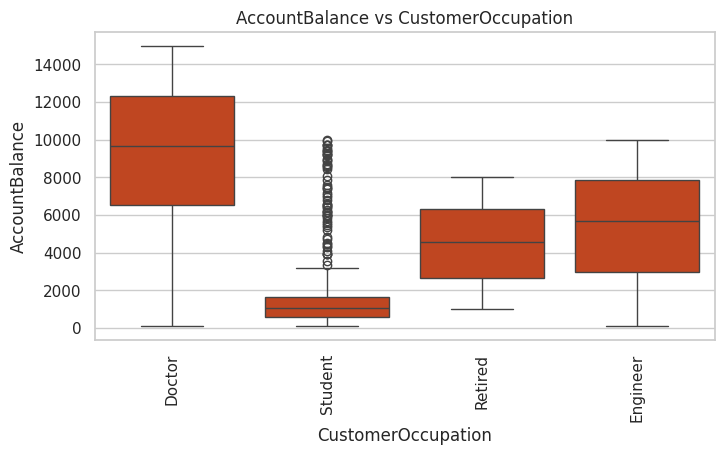

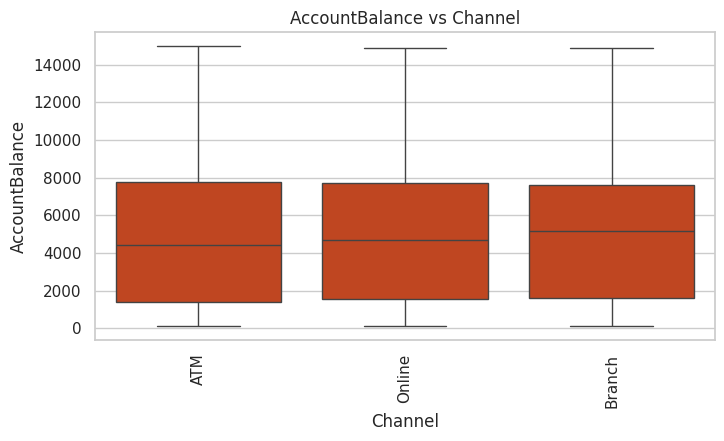

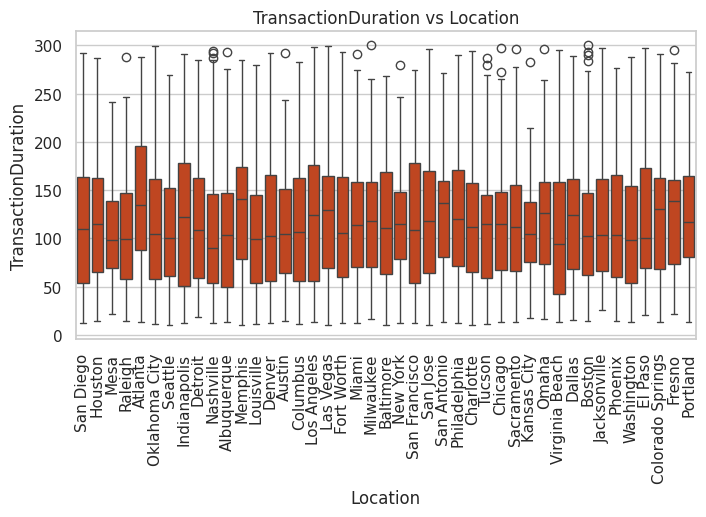

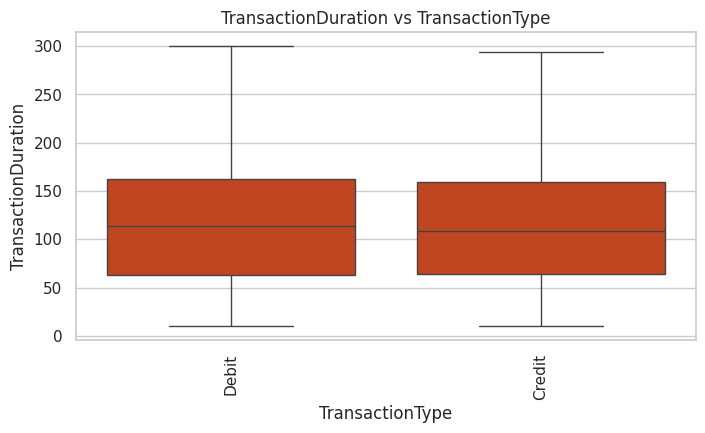

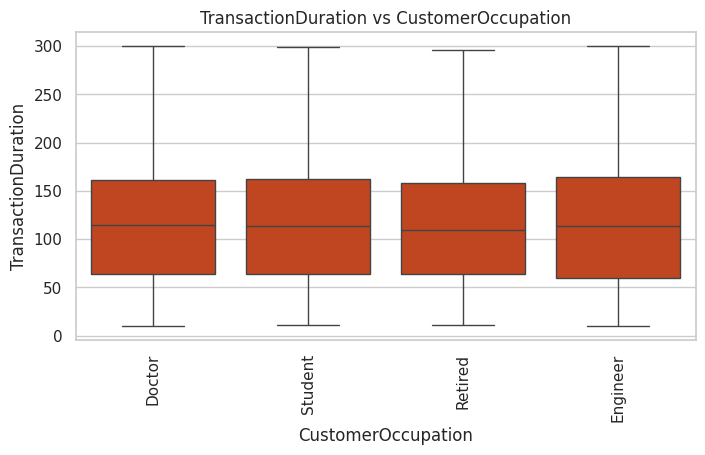

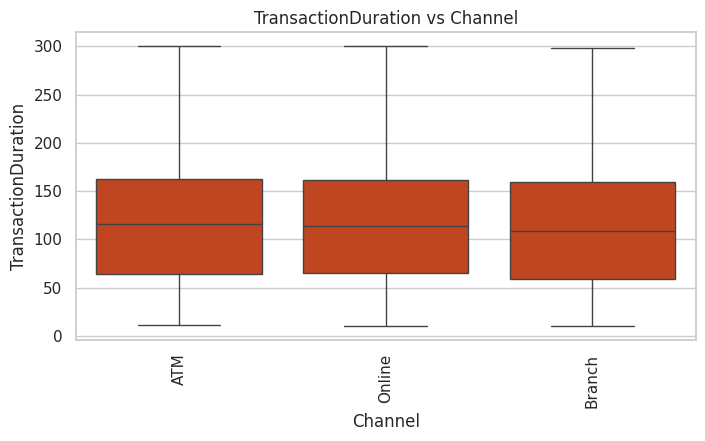

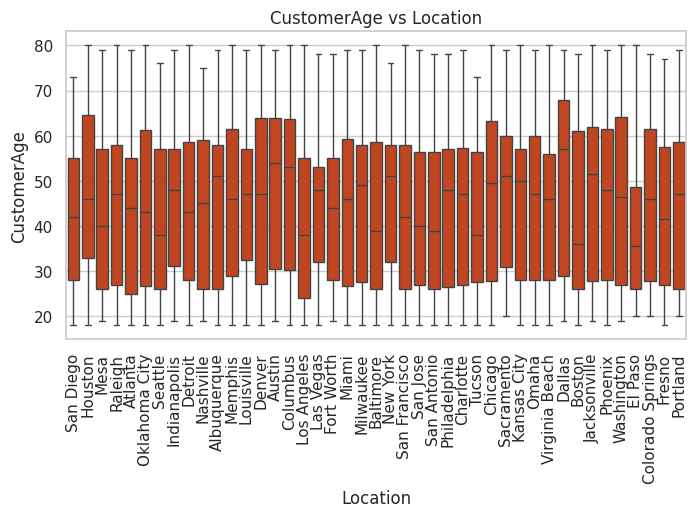

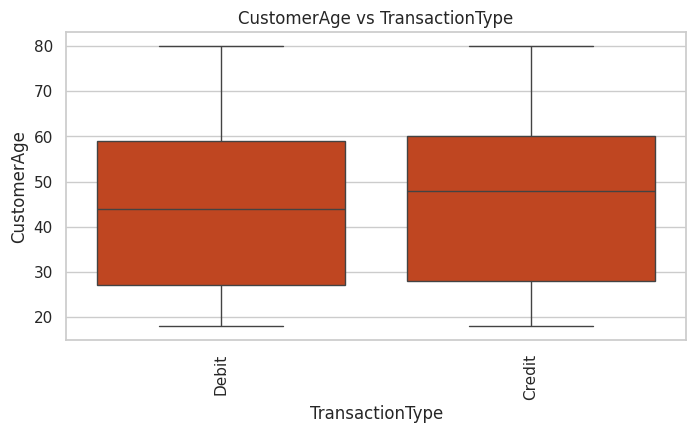

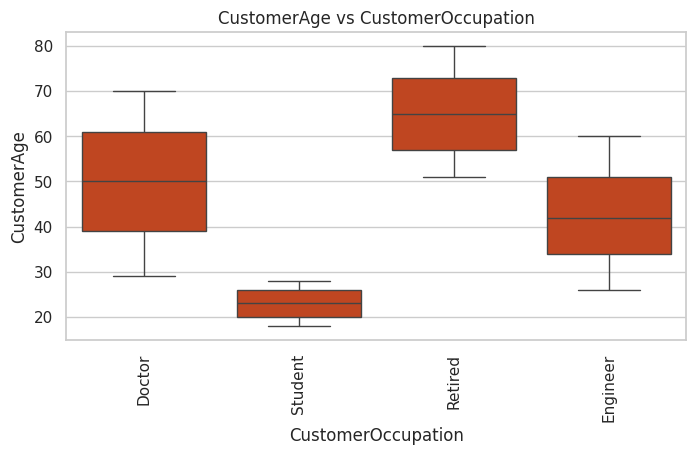

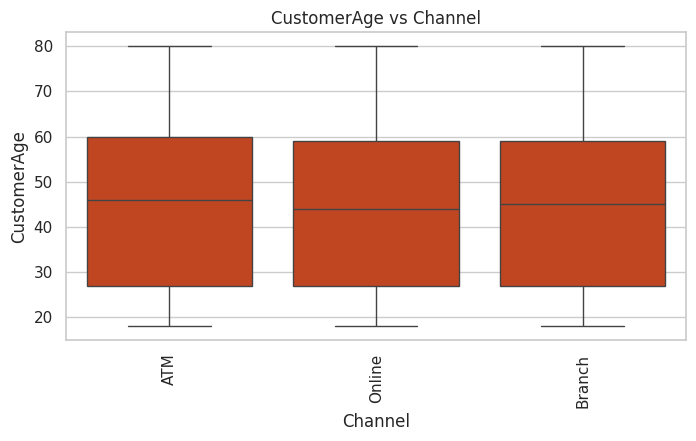

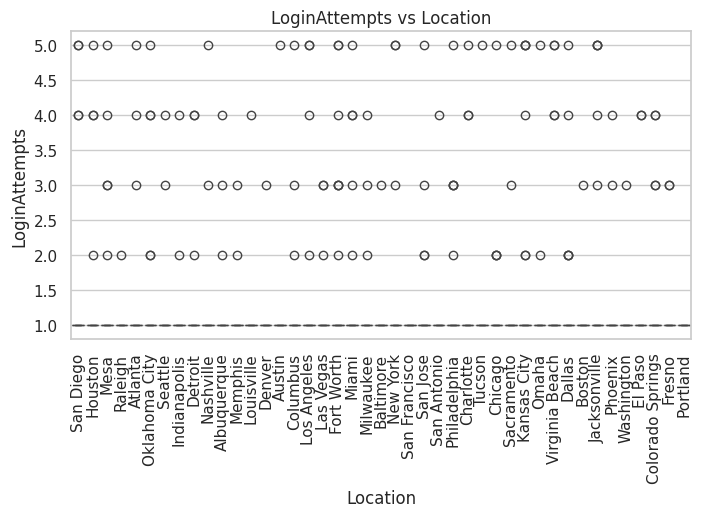

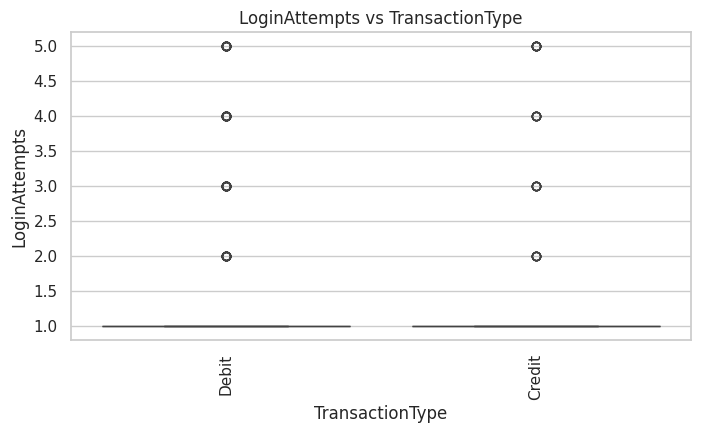

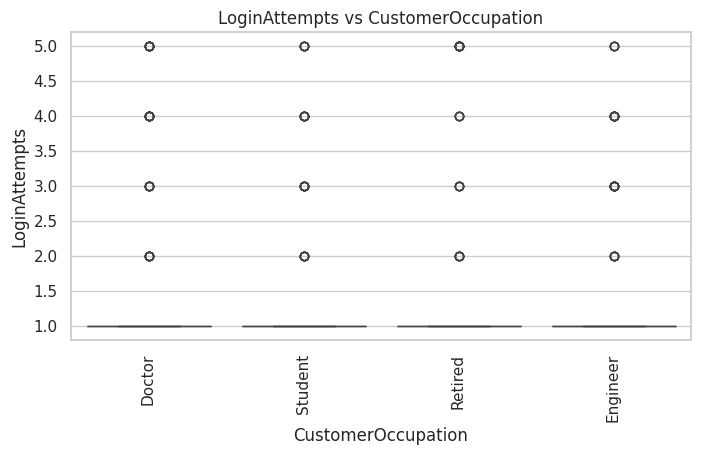

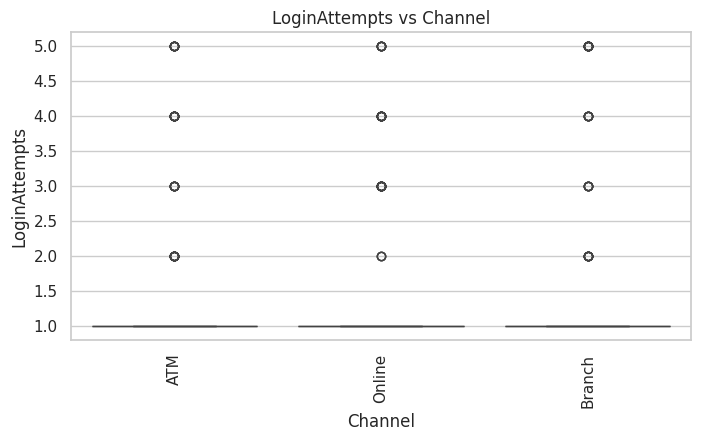

In [30]:
# Numerical and Categorical Analysis over the Columns
#set a colorful style for the plots
sns.set(style='whitegrid', palette='turbo_r')

# creating numerical columns for analysis
numerical_columns = ['TransactionAmount', 'AccountBalance', 'TransactionDuration', 'CustomerAge', 'LoginAttempts']
# creating categorical columns for analysis
categorical_columns = ['Location', 'TransactionType', 'CustomerOccupation', 'Channel']

for numerical in numerical_columns:
  for categorical in categorical_columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=categorical, y=numerical, data=dataset)
    plt.title(f'{numerical} vs {categorical}')
    plt.xticks(rotation=90) #rotating x-axis label for better readibility
    plt.xlabel(categorical)
    plt.ylabel(numerical)
    plt.show()


Using box plots, the plots show a comparison of the dataset's numerical and categorical variables.  Through the display of central tendency, spread, and skewness, it aids in the analysis of patterns, trends, and potential outliers by illustrating how the distribution across numerical variables differs across other category features.

 By examining these connections, the research sheds light on how various aspects could be influenced by the interaction.  Visualising more data and model development helps to understand it.

Further explanation regarding the box plotting distribution shown above:


---



**TransactionAmount vs Location**

We represent here the visualisation of transaction amount accross different locations which assists us in determining whether transaction amount are larger or lower in different locations than in others. This part is indicating regional spending patterns.


---



**TransactionAmount vs TransactionType**

In this plot we are identifying if their is any discernible distinction between transaction amount across the different possible transaction payment types.


---



**TranasactionAmount vs CustomerOccupation**

Here we are visualising different transaction amounts across different customer occupations, which highlights different spending habits relative to occupation.


---



**TransactionAmount vs Channel**

This plot examines the transaction amounts throughout different channels (e.g. Branch, ATM or Online).

---


**AccountBalance vs Location**

Box plotting the distribution of account balances across different locations. This potentially could reflect other regional economic factors.

---


**AccountBalance vs TransactionType**

Account balance distribution across different transaction types indicating whether certain transaction methods are preferred based on account balance.

---


**AccountBalance vs CustomerOccupation**

The following plot visualises account balances across customer occupation, which provides insights into customer's financial profiles.

---

**AccountBalance vs Channel**

Examining customers preferences over channel accessibility depending on customer account balance.

---


**TransactionDuration vs Location**

The box plot presents the distribution of transaction duration over different locations, depicting where transactions typically are taking longer or shorter time.

----


**TransactionDuration vs TransactionType**

Presenting transaction duration distribution for different transaction types, which might require longer or shorter processing times.

---


**TransactionDuration vs CustomerOccupation**

Compares transaction duration time to customer occupations to indicate if either have any impact on the other.

---


**TransactionDuration vs Channel**

Indicating operational efficiency or technical limitations over transaction duration based on channel usage with longer or shorter processing times.

---

**CustomerAge vs Location**

The consumer's age is displayed in this box plot across different locations, representing either a younger or older customer base per region.

---


**CustomerAge vs TransactionType**

Visualizing whether customer age leads to preferences in transaction type.

---


**CustomerAge vs CustomerOccupation**

This plot can draw attention to age distributions within various occupational categories.

---


**CustomerAge vs Channel**

Customer age vs Channel could show whether some channels are more well-liked by particular age groups, which could indicate preferences for accessibility or technological adoption.

---


**LoginAttempts vs Location**

It can detect areas where the frequency of login attempts is abnormally high or low, which may point to suspicious activity.

---

**LoginAttempts vs TransactionType**

Depicting the relationship between login attempts and transaction types. Displaying whether any given transaction type may lead to a substantial increase or decrease in login attempt count.

---

**LoginAttempts vs CustomerOccupation**

Displays login attempt trends across customer occupations.

---

**LoginAttempts vs Channel**

Channels with higher or lower login attempt rates may be highlighted.



## 1.4 Model Development and Evaluation

Train and evaluate learning models, e.g., supervised: linear regression, decision trees, and unsupervised: K-means.

Use appropriate evaluation metrics, e.g., R-squared, accuracy, precision, recall, F1-score, etc.

Provide a clear interpretation of the model performance using classification report, tables or graphs.

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import classification_report

### 1.4.1 K-Means for Fraud Detection

Utilize Principal Component Analysis to scale down features of the dataset primarily for data visualization.

In [32]:
from sklearn.decomposition import PCA
# scale down the dataset to 2 principal components
pca = PCA(n_components=2)
reducedCluster = pca.fit_transform(strippedDataset)

Visualization of data points before clustering.




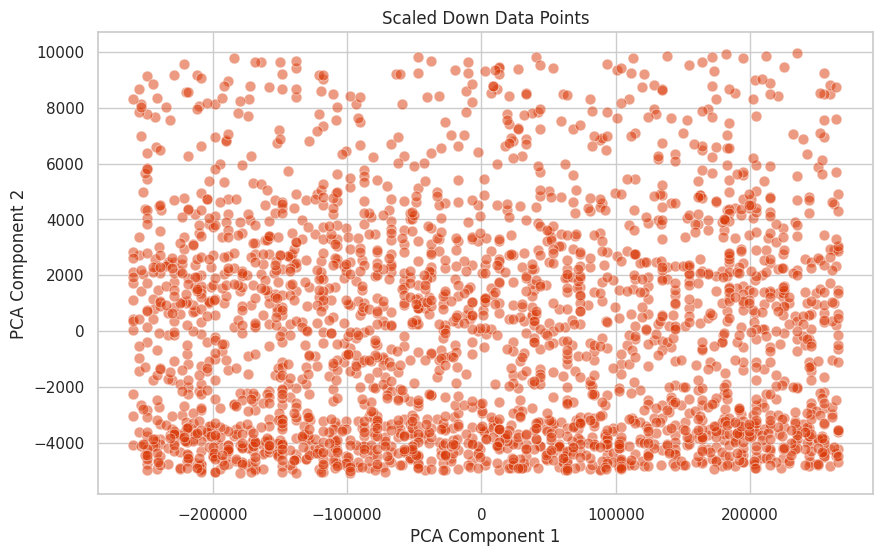

In [33]:
# plot PCA scaled down version of the dataset to be used for clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reducedCluster[:, 0], y=reducedCluster[:, 1], s=60, alpha=0.5)
plt.title('Scaled Down Data Points')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

Utilize the elbow method to determine the optimal value for K in K-Means Clustering.

In [34]:
# Elbow Method for identifying optimal K Value
from scipy.spatial.distance import cdist
distortions = []
inertia = []
K = range(1, 10)
for k in K:
  kMeans = KMeans(n_clusters = k, random_state=42)
  kMeans.fit(reducedCluster)
  distortions.append(sum(np.min(cdist(reducedCluster, kMeans.cluster_centers_, 'euclidean'), axis=1)**2) / reducedCluster.shape[0])
  inertia.append(kMeans.inertia_)



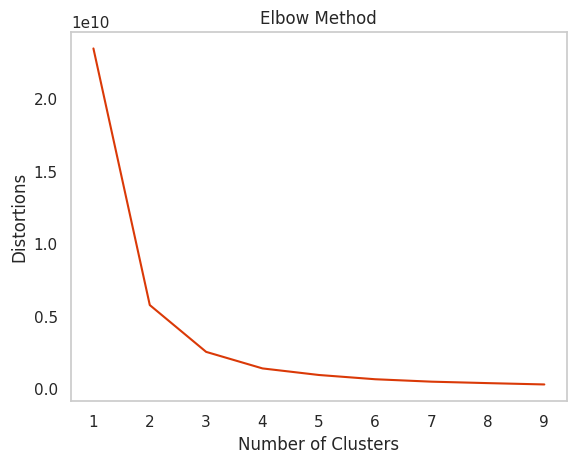

In [35]:
# Plot using distortions
plt.plot(K, distortions)
plt.xlabel("Number of Clusters")
plt.ylabel("Distortions")
plt.title("Elbow Method")
plt.grid()
plt.show()

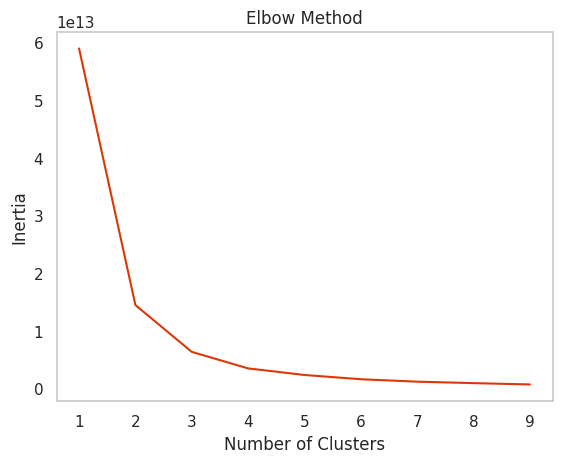

In [36]:
# Plot using inertia
plt.plot(K, inertia)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.grid()
plt.show()

Applies K-Means clustering to the scaled down set of features.

In [37]:
# perform K Means clustering on the principal components of the dataset
# best K value determined using elbow method above
fraud_k_means = KMeans(n_clusters = 5, random_state=42)
fraud_k_means.fit(reducedCluster)
# assign cluster labels to a column in the dataframe
strippedDataset['Clustered'] = fraud_k_means.labels_


Display the Silhouette Score of the clustering. The Silhouette Score measures how similar a data point is to its cluster as well as how separated the cluster is from other clusters. Higher scores indicate better overall clustering results.

In [38]:
# calculate silhouette score, providing an indicator for how well formed the created clusters are
fraud_silhouette_avg = silhouette_score(reducedCluster, strippedDataset['Clustered'])
print(f"Silhouette Score: {fraud_silhouette_avg}")

Silhouette Score: 0.5558800140108332


Visualization of the clustered groups of datapoints.

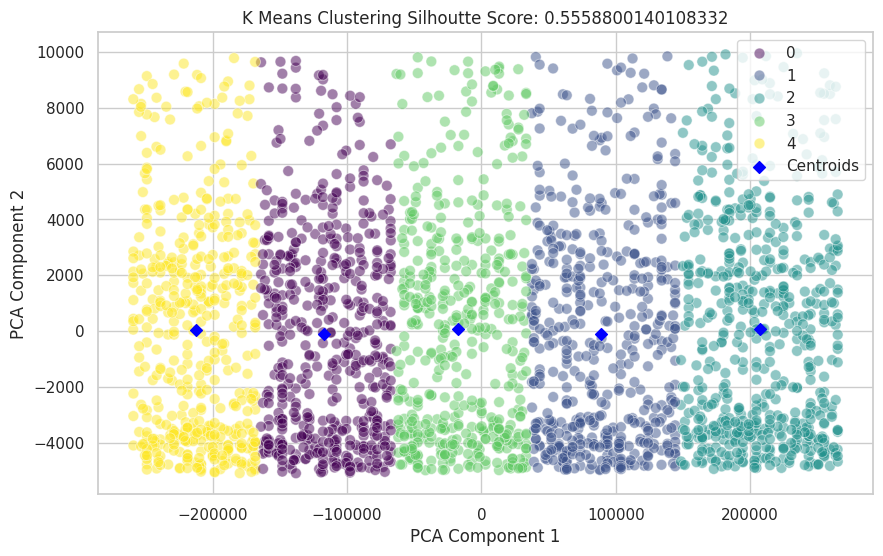

In [39]:
# plot the clustered principal components in their respective clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reducedCluster[:, 0], y=reducedCluster[:, 1], hue=strippedDataset['Clustered'], palette='viridis', s=60, alpha=0.5)
plt.scatter(fraud_k_means.cluster_centers_[:, 0], fraud_k_means.cluster_centers_[:, 1], c='blue', label='Centroids', marker='D')
plt.title('K Means Clustering Silhoutte Score: '+str(fraud_silhouette_avg))
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


### 1.4.2 Outlier Identification

Outliers are those specific data entries which fall very far away from the cluster's centroid.


In [40]:
# calculate distance between each data point and the center of its cluster
def getEuclideanDist(ds, centroids):
  clusterGroup = ds['Clustered']
  centroidLoc = np.array(centroids[clusterGroup])
  distances = np.linalg.norm(reducedCluster - centroidLoc, axis=1)
  strippedDataset['DistanceToCentroid'] = distances


# get the euclidean distance of each point to its cluster's centroid
getEuclideanDist(strippedDataset, fraud_k_means.cluster_centers_)

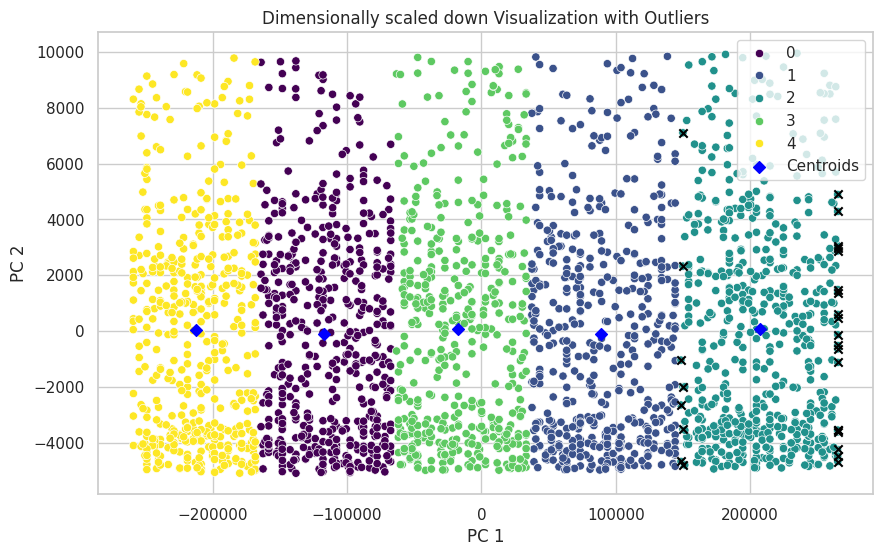

In [41]:
# identify outlier datapoints
def findOutliers():
  # outliers are datapoints which exist further away from their centroid than the average distance to centroids + 2 standard deviations
  meanDistance = strippedDataset['DistanceToCentroid'].mean()
  stdDistance = strippedDataset['DistanceToCentroid'].std()
  threshold = meanDistance + 2 * stdDistance
  outlier = (strippedDataset['DistanceToCentroid'] > threshold)

  dataset['SuspiciousTransaction'] = outlier


# display outlier data points in the cluster visualization
def displayOutliers():
  sns.set_style("whitegrid")
  plt.figure(figsize=(10, 6))
  sns.scatterplot(x=reducedCluster[:, 0], y=reducedCluster[:, 1], hue=strippedDataset['Clustered'], palette='viridis', zorder=1)
  plt.scatter(reducedCluster[dataset['SuspiciousTransaction'], 0], reducedCluster[dataset['SuspiciousTransaction'], 1], c='black', marker='x', zorder=2)
  plt.scatter(fraud_k_means.cluster_centers_[:, 0], fraud_k_means.cluster_centers_[:, 1], c='blue', label='Centroids', marker='D', zorder=3)
  plt.title("Dimensionally scaled down Visualization with Outliers")
  plt.xlabel("PC 1")
  plt.ylabel("PC 2")
  plt.legend()
  plt.show()


findOutliers()
displayOutliers()

### 1.4.3 Analyse Clusters

In [42]:
# display some suspected fraudulent transactions
fraud = dataset[dataset['SuspiciousTransaction']]
print(fraud.shape)
display(fraud.head(20))

(27, 24)


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,AccountBalance,PreviousTransactionDate,TimeGap,TransactionDateWeek,TransactionDateTimeOfDay,PreviousTransactionDateWeek,PreviousTransactionDateTimeOfDay,Hour,TA:AB Ratio,SuspiciousTransaction
104,TX000105,AC00170,129.94,2023-01-02 16:36:02,Debit,Las Vegas,D000647,111.226.226.202,M045,ATM,...,7954.92,2024-11-04 08:06:35,967170.550000,Monday,Afternoon,Monday,Morning,16,0.016335,True
362,TX000363,AC00063,873.65,2023-03-23 16:38:40,Credit,Oklahoma City,D000414,214.247.164.80,M050,Online,...,12139.83,2024-11-04 08:09:57,851971.283333,Thursday,Afternoon,Monday,Morning,16,0.071966,True
549,TX000550,AC00257,73.88,2023-01-02 16:27:18,Debit,Charlotte,D000611,142.148.226.178,M015,Online,...,6474.41,2024-11-04 08:09:09,967181.850000,Monday,Afternoon,Monday,Morning,16,0.011411,True
567,TX000568,AC00240,350.14,2023-03-24 18:50:42,Credit,Los Angeles,D000182,161.168.126.136,M048,Online,...,2403.25,2024-11-04 08:08:40,850397.966667,Friday,Evening,Monday,Morning,18,0.145694,True
638,TX000639,AC00416,655.15,2023-01-02 16:22:54,Debit,Seattle,D000626,11.167.243.171,M083,ATM,...,5587.44,2024-11-04 08:07:15,967184.350000,Monday,Afternoon,Monday,Morning,16,0.117254,True
655,TX000656,AC00458,156.26,2023-01-02 17:49:44,Credit,Virginia Beach,D000134,51.196.87.214,M059,Branch,...,7854.10,2024-11-04 08:09:29,967099.750000,Monday,Evening,Monday,Morning,17,0.019895,True
664,TX000665,AC00133,245.67,2023-01-02 18:35:07,Credit,Portland,D000097,3.77.114.6,M088,Branch,...,752.25,2024-11-04 08:07:45,967052.633333,Monday,Evening,Monday,Morning,18,0.326580,True
876,TX000877,AC00304,204.06,2023-01-02 16:07:17,Debit,Washington,D000685,150.231.20.169,M069,Online,...,4351.83,2024-11-04 08:07:22,967200.083333,Monday,Afternoon,Monday,Morning,16,0.046891,True
982,TX000983,AC00281,453.49,2023-01-02 16:06:29,Debit,Seattle,D000471,40.226.196.34,M088,Branch,...,6366.43,2024-11-04 08:08:56,967202.450000,Monday,Afternoon,Monday,Morning,16,0.071231,True
1062,TX001063,AC00456,68.10,2023-01-02 16:00:06,Debit,Milwaukee,D000235,94.227.164.192,M089,ATM,...,1382.80,2024-11-04 08:10:15,967210.150000,Monday,Afternoon,Monday,Morning,16,0.049248,True


## 1.5 Ethical Considerations

Highlight potential biases or fairness issues in the dataset or models.

Suggest practical strategies for mitigating these ethical challenges.